In [1]:
import cv2
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import utils

## Part II

The Fourier transform is complex, so it can be expressed in polar form as:

$$ f(u, v) = \left| F(u, v)\right| e^{j\varphi (u, v)} $$

where |𝐹(𝑢, 𝑣)| is the spectrum:

$$ \left| F(u, v)\right| = \left [ R_{(u, v)}^{2} + I_{(u, v)}^{2} \right ]^{1/2} $$

and 𝜑(𝑢, 𝑣) is the phase angle:

$$ \varphi (u, v) = tan^{-1}\left [ \frac{I_{(u, v)}}{R_{(u, v)}} \right ] $$

In the code above, we first load the image using OpenCV and compute the Fourier transform using fft2. We then compute the spectrum and phase angle using utils.abs and np.angle, respectively.

We plot the spectrum and phase angle using matplotlib. We plotted both spectrum and centered spectrum in different sub plots.

_Note: We also resized lenna image to 256x256 to match the size of camera man image which we'll work with later._

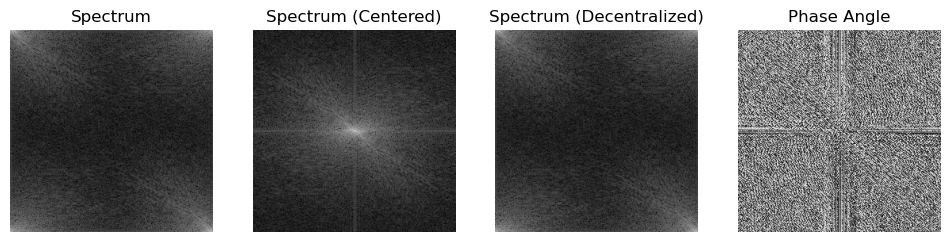

In [2]:
# Load the image
lenna_im = utils.normalize_image(cv2.resize(cv2.imread('lenna.tif', cv2.IMREAD_GRAYSCALE), (256, 256), interpolation=cv2.INTER_AREA))

# Compute the Fourier transform
lenna_ft = np.fft.fft2(lenna_im)

# Shift the zero frequency component to the center of the spectrum
lenna_ft_shifted = np.fft.fftshift(lenna_ft)
lenna_ft_unshifted = np.fft.ifftshift(lenna_ft_shifted)

# Calculate the magnitude and phase angle of the spectrum
lenna_spectrum = utils.abs(lenna_ft_shifted)
lenna_phase = np.angle(lenna_ft_shifted)

# Plot the magnitude and phase angle
fig, axs = plt.subplots(1, 4, figsize=(12, 6))

axs[0].imshow(np.log10(1 + utils.abs(lenna_ft)), cmap='gray')
axs[0].axis('off')
axs[0].set_title('Spectrum')

axs[1].imshow(np.log10(1 + lenna_spectrum), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Spectrum (Centered)')

axs[2].imshow(np.log10(1 + utils.abs(lenna_ft_unshifted)), cmap='gray')
axs[2].axis('off')
axs[2].set_title('Spectrum (Decentralized)')

axs[3].imshow(lenna_phase, cmap='gray')
axs[3].axis('off')
axs[3].set_title('Phase Angle')

# Show the plot
plt.show()

 To reconstruct the image using only the phase information, we take the inverse Fourier transform of the complex exponential exp(1j * phase) using np.fft.ifft2.

 We then take the real part of the reconstructed image, since the imaginary part is typically small and can be ignored. Finally, we plot the original and reconstructed images side by side using matplotlib.

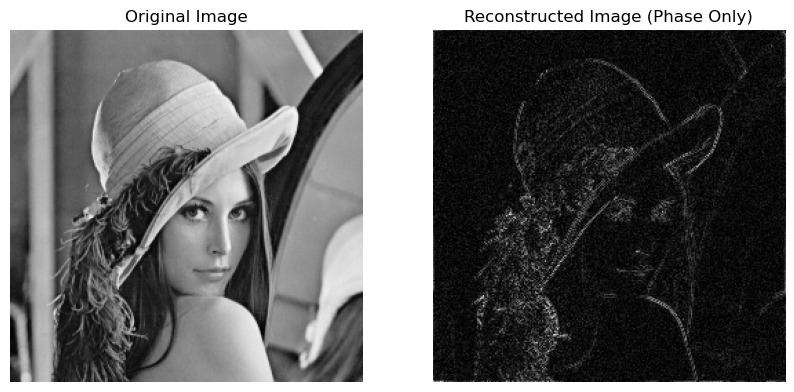

In [3]:
# Reconstruct the Fourier transform using only the phase angle
reconstructed = abs(np.fft.ifft2(np.exp(1j * lenna_phase)))

# Take the real part of the reconstructed image
reconstructed = np.real(reconstructed)
reconstructed_imag = np.imag(reconstructed)

# Plot the original and reconstructed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(lenna_im, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(reconstructed, cmap='gray')
axs[1].axis('off')
axs[1].set_title('Reconstructed Image (Phase Only)')

# Show the plot
plt.show()

To compute the inverse transform using only the spectrum term, we need to create a complex array where the real part is the spectrum and the imaginary part is all zeros. We can then apply the inverse Fourier transform using ifft2 and take the real part to get the reconstructed image.

To display the spectrum we used the following formula:

$$ log(1 + \left| F(u, v)\right|) $$

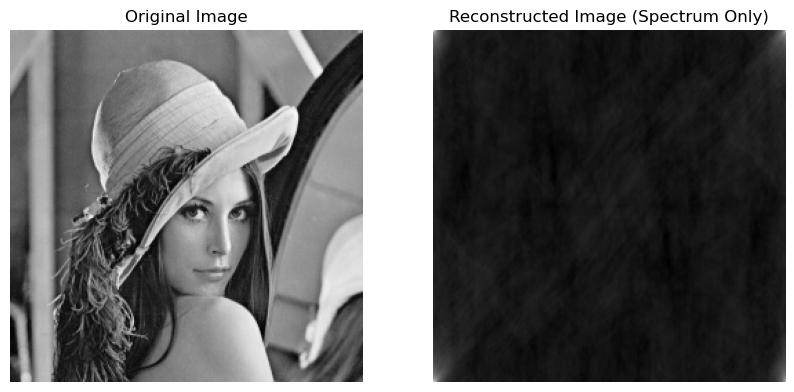

In [4]:
# Reconstruct the Fourier transform using only the magnitude spectrum
reconstructed = np.fft.ifft2(lenna_spectrum * np.exp(1j * np.zeros_like(lenna_phase)))

# Take the real part of the reconstructed image
reconstructed = utils.abs(reconstructed)

# Plot the original and reconstructed images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(lenna_im, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(np.log(1 + reconstructed), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Reconstructed Image (Spectrum Only)')

# Show the plot
plt.show()

In this last section we computed the spectrum of cameraman.bmp and calculate the inverse transform using spectrum of cameraman.bmp and phase angle of lenna.tif

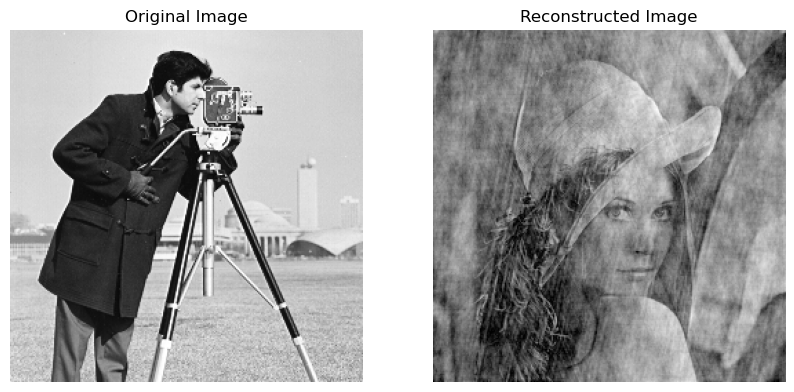

In [5]:
# Load cameraman image
cameraman_im = utils.normalize_image(cv2.imread('cameraman.bmp', cv2.IMREAD_GRAYSCALE))

# Compute Fourier transform of camerman and calculate spectrum
cameraman_ft = np.fft.fft2(cameraman_im)
cameraman_shifted_ft = np.fft.fftshift(cameraman_ft)

cameraman_spectrum = utils.abs(cameraman_shifted_ft)
cameraman_phase = np.angle(cameraman_shifted_ft)

# Reconstruct using spectrum of cameraman and phase of lenna
f_reconstructed = cameraman_spectrum * np.exp(1j * lenna_phase)
im_reconstructed = utils.abs(np.fft.ifft2(f_reconstructed))

# Plot original and reconstructed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cameraman_im, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')

axs[1].imshow(np.log10(1 + utils.abs(im_reconstructed)), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Reconstructed Image')

# Show the plot
plt.show()

### Conclusion

The magnitude spectrum and phase spectrum of an image contain different types of information about the image:

1. The magnitude spectrum of an image represents the amount of each frequency present in the image. It is obtained by taking the absolute value of the Fourier transform of the image. The magnitude spectrum contains information about the brightness and contrast of the image, as well as the frequency content of the image.

2. The phase spectrum of an image represents the spatial layout of the frequencies in the image. It is obtained by taking the complex argument of the Fourier transform of the image. The phase spectrum contains information about the edges and texture of the image, as well as the orientation and frequency of the features in the image.

Together, the magnitude and phase spectra give us a complete representation of the Fourier transform of the image. This representation is useful in many image processing applications, such as image compression, filtering, and feature extraction.

We could see that in case of given images, the phase hold more information that magnitude spectrum.